> # **Final Project**
> #### **DSAI 302 Spring 2024**

>**Name**: Doğukan Çayağzı
>
>**Student Number**: 2022205159

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

In this project our task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help us make these predictions, we're given a set of personal records recovered from the ship's damaged computer system.

# **0 - Introduction**

### **Dataset Description:**

**Data Dictionary:**

Variable    | Definition	Key |Values|
------------|-------------------|----|
PassangerID |A unique identifier for each passenger,Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.|
HomePlanet 	| The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep	    | Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin|The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either | P for Port or S for Starboard.|
Destination 	        | The planet the passenger will be debarking to.
Age	        |The age of the passenger.|
VIP	    |Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck    |Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name	    |The first and last names of the passenger.
Transported	    |Whether the passenger was transported to another dimension. This is the target, the column we are trying to predict..


## **0.1 - Loading the dataset and importing libaries**


In [1]:
from google.colab import  userdata
import os

kaggle_data={"username":"dogilee","key":"b5dd06733d6b8ef52eb82c9c32359306"}
os.environ['KAGGLE_USERNAME']=kaggle_data["username"]
os.environ['KAGGLE_KEY']=kaggle_data["key"]


In [2]:
! kaggle competitions download -c spaceship-titanic -f train.csv
! kaggle competitions download -c spaceship-titanic -f test.csv

100% 787k/787k [00:00<00:00, 2.31MB/s]
100% 787k/787k [00:00<00:00, 2.30MB/s]
100% 364k/364k [00:00<00:00, 1.40MB/s]
100% 364k/364k [00:00<00:00, 1.39MB/s]


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
import plotly.express as px
from math import pi
from scipy.stats import boxcox, shapiro
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier


from lightgbm import LGBMClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# **1-Exploratory Data Analysis**

### 1.1 - General operations on the dataset (Handling missing values & duplicated values etc.)

1. Taking general look at data to gain some insight

In [5]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


2. Notice that Transported is the target variable which is only available in the train dataset.

Check shapes of train and test datasets seperately and make some explorations to gain more insights about the data

In [7]:
print(f"Shape of train data set is {train_df.shape}")
print(f"Shape of test data set is {test_df.shape}")

Shape of train data set is (8693, 14)
Shape of test data set is (4277, 13)


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


3. Now we need to check if there are any missing values in the dataset that we need to handle.

In [10]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

4. I'm uncertain about the exact percentages, but there is more missing data than I anticipated. Let's handle them.

    First, i will seperate categorical data and numerical data to work on these values easily

In [11]:
num_cols = list(train_df.select_dtypes(include=["int","float"]).columns)
cat_cols = ['PassengerId', 'HomePlanet', 'CryoSleep',  'Destination', 'VIP', 'Name', 'Transported']

In [12]:
print("Categorical Columns:",cat_cols)
print("\n")
print("\nNumerical Columns:",num_cols)

Categorical Columns: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name', 'Transported']



Numerical Columns: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


I will replace the missing values in categorical columns with their most frequent values, and for numerical columns, I will use the median.

In [13]:
cat_cols_t = ['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Name']

for column in cat_cols:
    most_frequent_value = train_df[column].mode()[0]
    train_df[column].fillna(most_frequent_value, inplace=True)
for column in num_cols:
    median_value = train_df[column].median()
    train_df[column].fillna(median_value, inplace=True)

for column in num_cols:
  mediant_value = test_df[column].median()
  test_df[column].fillna(median_value,inplace=True)
for column in cat_cols_t:
  most_frequent_valuet = test_df[column].mode()[0]
  test_df[column].fillna(most_frequent_valuet,inplace=True)

- I am **excluding** "Cabin" columns from categorical_cols because it causes a problem later when i do feature engineering

Checking again for missing values

In [14]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name              0
Transported       0
dtype: int64

- As i said i'm aware of these missing values in "Cabin" column i will handle them later

5. Now I will handle duplicated datas if there are any

In [15]:
print(f"Number of duplicated data in train dataset {train_df.duplicated().sum()}\n")
print(f"Number of duplicated data in test dataset {test_df.duplicated().sum()}")

Number of duplicated data in train dataset 0

Number of duplicated data in test dataset 0


Great! There are not
any duplicated values

6. Now we will look for unique valeus

In [16]:
print("Unique values in each column of train_df:")
print(train_df.nunique())

Unique values in each column of train_df:
PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64


### 1.2 - Visualization & Feature Engineering

1. First, let's visualize target column "Transported"

(-1.099999680639534,
 1.099997126422127,
 -1.0999996680085737,
 1.0999978625040165)

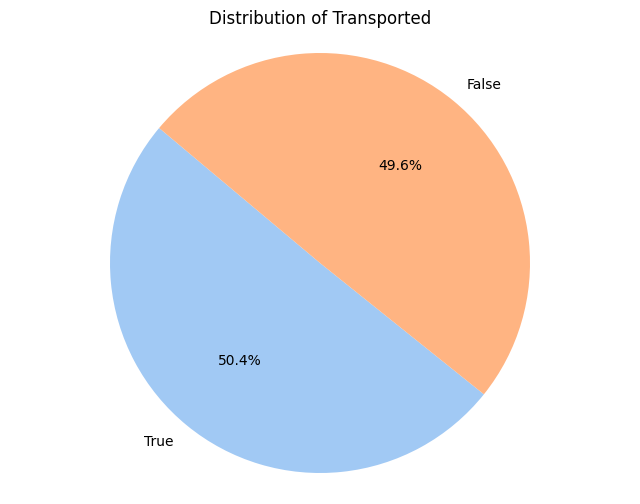

In [17]:
transported_counts = train_df['Transported'].value_counts()

plt.figure(figsize=(8, 6))
colors = sns.color_palette('pastel')[0:2]

plt.pie(transported_counts, labels=transported_counts.index, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Transported')
plt.axis('equal')

- Target column has highly balanced data

2. Now, let's visualize all the spending made by the passengers.








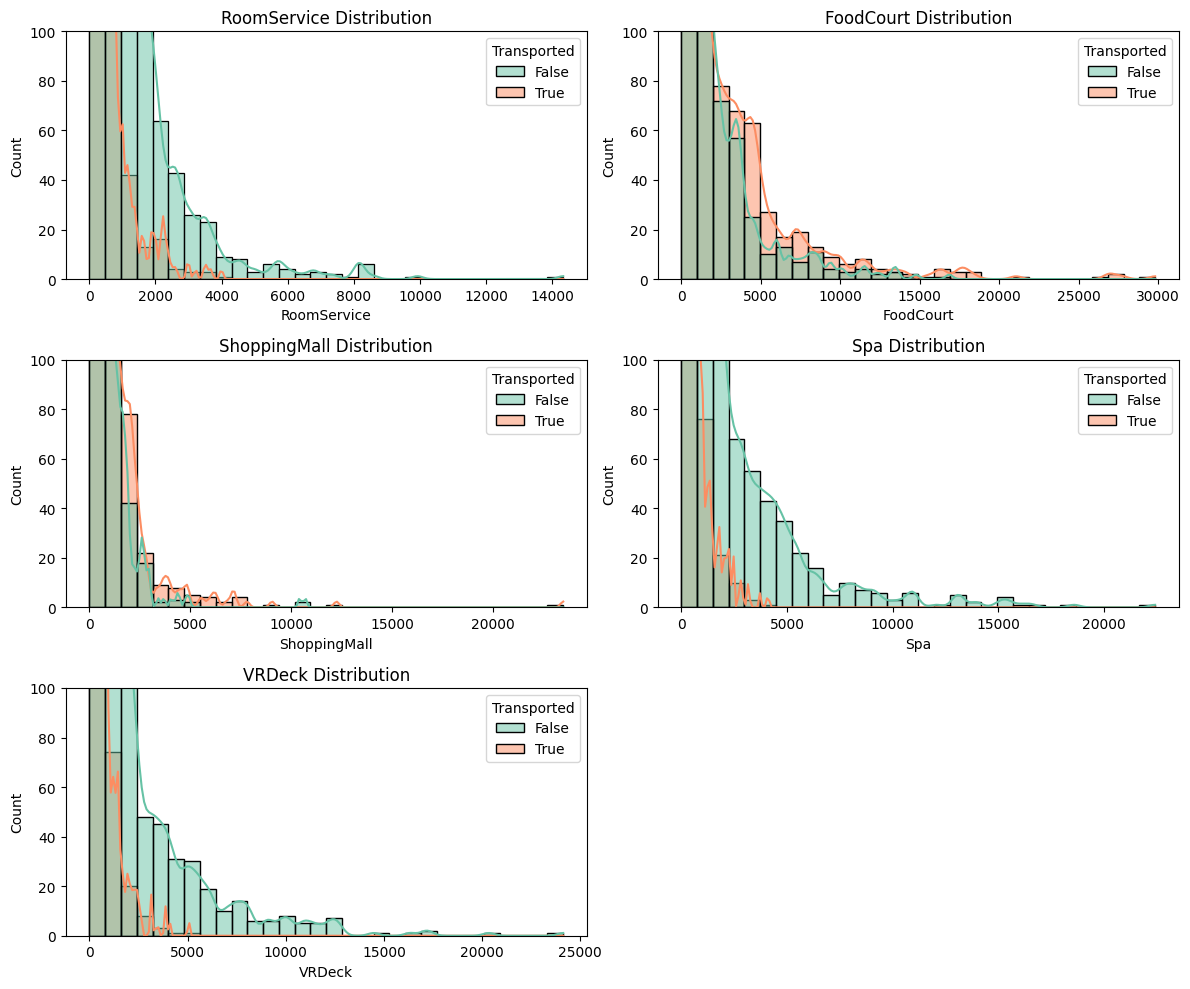

In [18]:
exp_cols = ["RoomService","FoodCourt","ShoppingMall","Spa","VRDeck"]

plt.figure(figsize=(12,10))

for i,column in enumerate(exp_cols):

    plt.subplot(3,2,i+1)
    sns.histplot(x=column, hue="Transported", data=train_df,bins=30,kde=True,palette="Set2")
    plt.title(f"{column} Distribution")
    plt.ylim(0,100)
    plt.tight_layout()



- Most of the expenses are nearly zero, so we can treat high expenditures as outliers.

- Passengers with lower expenses are more likely to be transported than those with higher expenses.

- All expenditure features have a right-skewed distribution. Therefore, before deploying the model, we will transform these features to a normal distribution using log transformation.

- Since many passengers have zero spending, we can create a new column called "No_Spending".

- We can also create a new column called "Total_Exp" that sums all the expenditures made by the passenger.


Let's draw a spider chart to see which expense is dominant

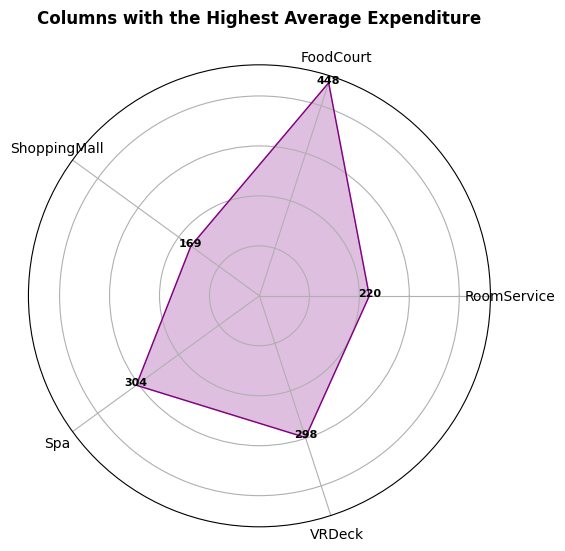

In [19]:
angles = np.linspace(0, 2 * np.pi, len(exp_cols), endpoint=False).tolist()
values = train_df[exp_cols].mean().tolist()

values += values[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='purple', alpha=0.25)
ax.plot(angles, values, color='purple', linewidth=1)

for j, angle in enumerate(angles[:-1]):
    ax.annotate(int(values[j]), xy=(angle, values[j]), xytext=(angle, values[j] + 0.1),
                ha='center', fontsize=8, color='black', fontweight='bold')

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(exp_cols)
plt.title('Columns with the Highest Average Expenditure', pad=30, fontweight='bold')

# Show the plot
plt.show()

3. Now from the insights that we gained above let's do some feature engineering

In [20]:
train_df['Total_Spending']= train_df['RoomService']+ train_df['FoodCourt']+ train_df['ShoppingMall']+ train_df['Spa']+ train_df['VRDeck']
test_df['Total_Spending']= test_df['RoomService']+ test_df['FoodCourt']+ test_df['ShoppingMall']+ test_df['Spa']+ test_df['VRDeck']

train_df["No_Spending"] = (train_df["Total_Spending"]==0)
test_df["No_Spending"] = (test_df["Total_Spending"]==0)

Visualizing Total_Spending

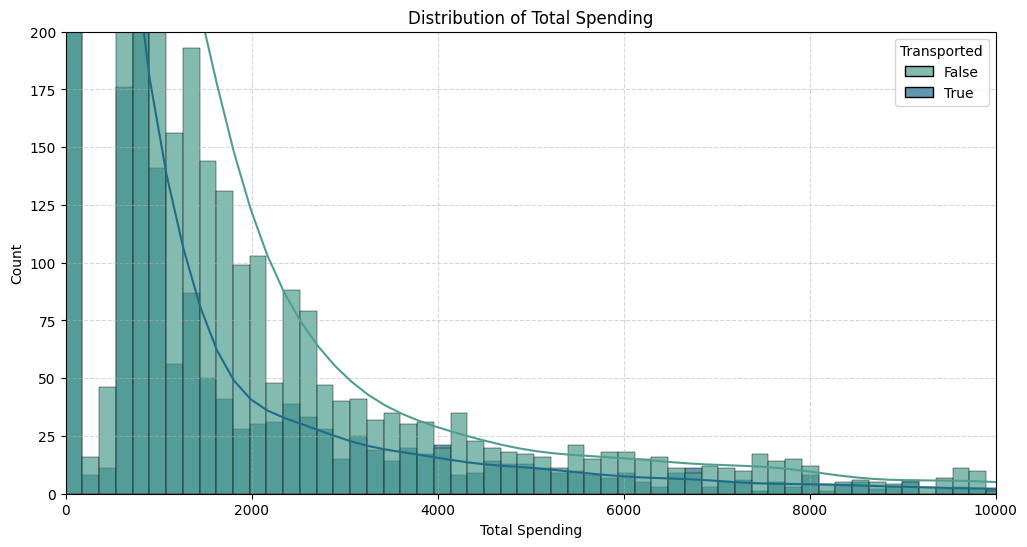

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x="Total_Spending", hue="Transported", bins=200, kde=True, palette="crest", alpha=0.7)
plt.ylim(0, 200)
plt.xlim(0, 10000)
plt.title("Distribution of Total Spending")
plt.xlabel("Total Spending")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)




plt.show()

- To create new columns from Total_Spending columns we may make some calculations

In [22]:
med_total =train_df["Total_Spending"].median()
mean_total = train_df["Total_Spending"].mean()

print(f"Median of Total Spending is {med_total}")
print(f"Mean of Total Spending is {mean_total}")

Median of Total Spending is 716.0
Mean of Total Spending is 1440.8663292304152


Since median of Total_Spending is 716 i will categorize this column by 716 sized bins

- if Total_Spending = 0 No_Spending
- if Total_Spending = 1-716 --> Low_Spending
- if Total_Spending = 716-1441 --> Medium_Spending
- if Total_Spending > 1441 --> High_Spending

In [23]:
bins = [0, 1, 716, 1441, float('inf')]
labels = ['No_Spending', 'Low_Spending', 'Medium_Spending', 'High_Spending']

train_df['Expense_Category'] = pd.cut(train_df['Total_Spending'], bins=bins, labels=labels, right=False)


test_df['Expense_Category'] = pd.cut(test_df['Total_Spending'], bins=bins, labels=labels, right=False)





Visualize new columns

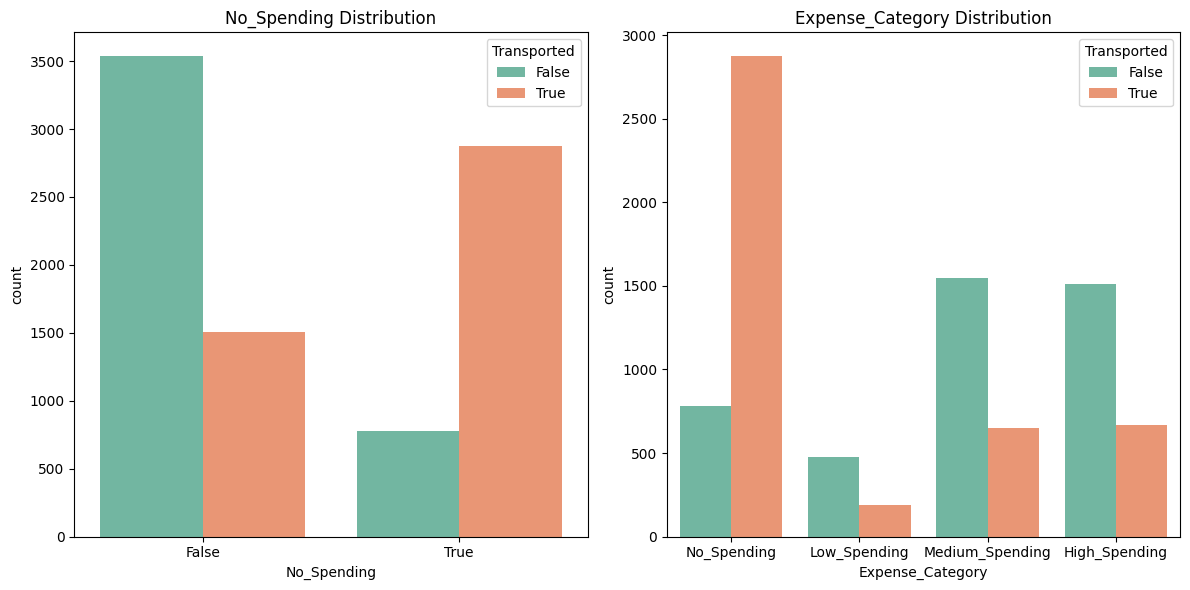

In [24]:
exp_cols = ["No_Spending","Expense_Category"]

plt.figure(figsize=(12,6))

for i,column in enumerate(exp_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(x=column, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

- No spending ---> Highly Transported
- Less total spending ---> Highly Transported

4. Additionally, we can group by age, but first, let's gain more insight into the age distribution.

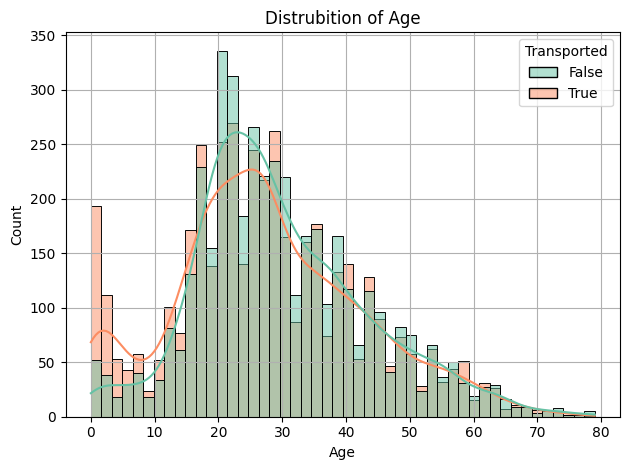

<Figure size 1400x1200 with 0 Axes>

In [25]:
sns.histplot(data=train_df, x = "Age",kde=True,palette="Set2",hue="Transported")
plt.xlabel('Age')
plt.title("Distrubition of Age")
plt.grid(True)
plt.tight_layout()
plt.figure(figsize=(14,12))

plt.show()

The age distribution is almost normal, with an anomaly near zero. Let's group the "Age" column into six groups, as there are very few passengers above the age of 70. Age from 16-32 passengers are comparatively less transported when compared to not transported passengers.

5. Now grouping by age

In [26]:
bins = [0, 10, 20, 30, 40, 50, 60]
labels = [0, 1, 2, 3, 4, 5]

train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)
test_df['AgeGroup'] = pd.cut(test_df['Age'], bins=bins, labels=labels, right=False)

train_df['AgeGroup'] = train_df['AgeGroup'].cat.add_categories([-1]).fillna(-1).astype(int)
test_df['AgeGroup'] = test_df['AgeGroup'].cat.add_categories([-1]).fillna(-1).astype(int)

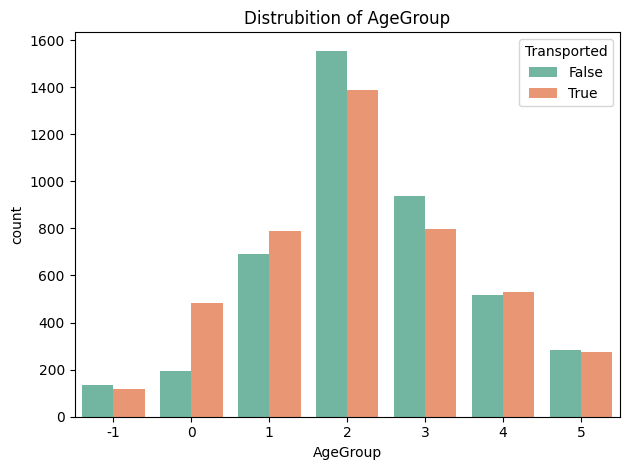

<Figure size 800x600 with 0 Axes>

In [27]:
sns.countplot(data=train_df, x = "AgeGroup",hue="Transported",palette="Set2")
plt.xlabel('AgeGroup')
plt.title("Distrubition of AgeGroup")
plt.tight_layout()
plt.figure(figsize=(8,6))

plt.show()

We can see that 20-30 aged people are more common

6. Now we can do some feature engineering for "Cabin" column

In [28]:
train_df["Cabin"].head(10).to_frame()

,Cabin
0,B/0/P
1,F/0/S
2,A/0/S
3,A/0/S
4,F/1/S
5,F/0/P
6,F/2/S
7,G/0/S
8,F/3/S
9,B/1/P


7. Before splitting we can fill remaining missing values by appropriate imputation

In [29]:
train_df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)
test_df["Cabin"].fillna("np.nan/np.nan/np.nan",inplace=True)

#I'am doing this because when i firstly imputated missing values with their mode etc.
#i have faced serious problems which causing several anomalies in cabin_number data

train_df["Cabin_Deck"] = train_df["Cabin"].apply(lambda x: x.split("/")[0])
train_df["Cabin_Number"]  = train_df["Cabin"].apply(lambda x: x.split("/")[1])
train_df["Cabin_Side"] = train_df["Cabin"].apply(lambda x: x.split("/")[2])

test_df["Cabin_Deck"] = test_df["Cabin"].apply(lambda x: x.split("/")[0])
test_df["Cabin_Number"]  = test_df["Cabin"].apply(lambda x: x.split("/")[1])
test_df["Cabin_Side"] = test_df["Cabin"].apply(lambda x: x.split("/")[2])

cols = ["Cabin_Deck","Cabin_Number","Cabin_Side"]
train_df[cols]=train_df[cols].replace("np.nan",np.nan)
test_df[cols]=test_df[cols].replace("np.nan",np.nan)



- Now we can replace np.nan with appropiate values some statistichal methods , i will use median for numeric values and mode for categorical values

In [30]:
train_df["Cabin_Deck"].fillna(train_df["Cabin_Deck"].mode()[0],inplace=True)
train_df["Cabin_Side"].fillna(train_df["Cabin_Side"].mode()[0],inplace=True)
train_df["Cabin_Number"].fillna(train_df["Cabin_Number"].median(),inplace=True)

test_df["Cabin_Deck"].fillna(test_df["Cabin_Deck"].mode()[0],inplace=True)
test_df["Cabin_Side"].fillna(test_df["Cabin_Side"].mode()[0],inplace=True)
test_df["Cabin_Number"].fillna(test_df["Cabin_Number"].median(),inplace=True)

- Before visualization let's do some statistical calculation

In [31]:
train_df["Cabin_Number"]=train_df["Cabin_Number"].astype(int)
test_df["Cabin_Number"]=test_df["Cabin_Number"].astype(int)

print(f"Number of unique values of Cabin Deck is {train_df['Cabin_Deck'].nunique()}")
print(f"Number of unique values of Cabin Number is {train_df['Cabin_Number'].nunique()}")
print(f"Number of unique values of Cabin Side is {train_df['Cabin_Side'].nunique()}""\n")

print(f"Median of the Cabin Number is {train_df['Cabin_Number'].median()}")
print(f"Mean of the Cabin Number is {train_df['Cabin_Number'].mean()}")
print(f"Minimum of the Cabin Number is {train_df['Cabin_Number'].min()}")
print(f"Maximum of the Cabin Number is {train_df['Cabin_Number'].max()}")

Number of unique values of Cabin Deck is 8
Number of unique values of Cabin Number is 1817
Number of unique values of Cabin Side is 2

Median of the Cabin Number is 427.0
Mean of the Cabin Number is 596.3989416772115
Minimum of the Cabin Number is 0
Maximum of the Cabin Number is 1894


8. Visualize all plots at the same time to gain insights

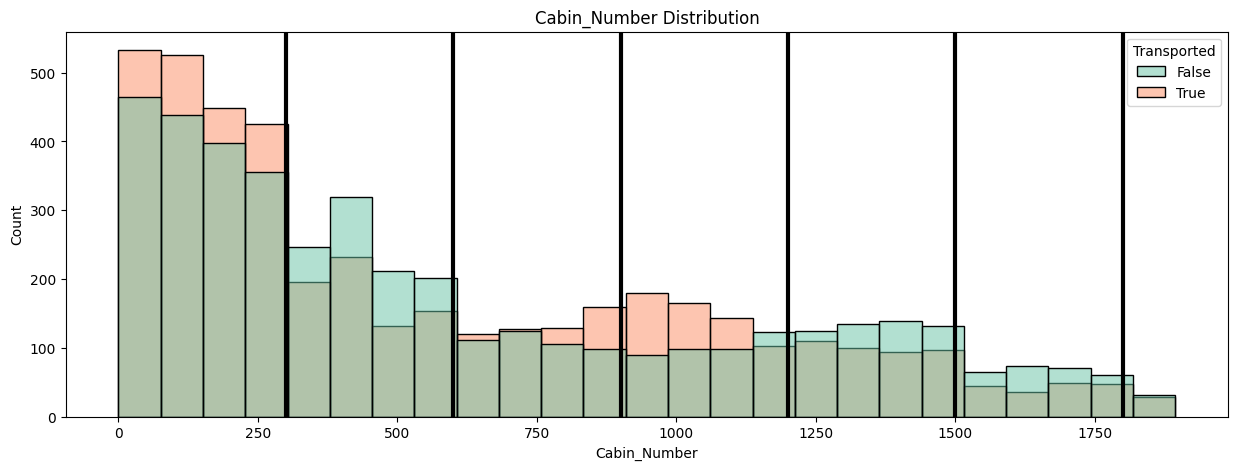

In [32]:
plt.figure(figsize=(15,5))
sns.histplot(x="Cabin_Number",data=train_df,hue="Transported",palette="Set2")
for i in range(300, int(train_df['Cabin_Number'].max()), 300):
    plt.axvline(x=i, color='black', linestyle='-', linewidth=3)

plt.title("Cabin_Number Distribution")
plt.show()



- It's quite interesting that we can seperate passengers with 300 sized bins with their cabin_number

In [33]:
def cabin_regions(df):
    df["Cabin_Interval1"] = (df["Cabin_Number"]<300)
    df["Cabin_Interval2"] = (df["Cabin_Number"]>=300) & (df["Cabin_Number"]<600)
    df["Cabin_Interval3"] = (df["Cabin_Number"]>=600) & (df["Cabin_Number"]<900)
    df["Cabin_Interval4"] = (df["Cabin_Number"]>=900) & (df["Cabin_Number"]<1200)
    df["Cabin_Interval5"] = (df["Cabin_Number"]>=1200) & (df["Cabin_Number"]<1500)
    df["Cabin_Interval6"] = (df["Cabin_Number"]>=1500)

cabin_regions(train_df)
cabin_regions(test_df)

- We don't need "Cabin_Number" column no more. Let's drop them

In [34]:
train_df.drop(columns=["Cabin_Number"],inplace=True)
test_df.drop(columns=["Cabin_Number"],inplace=True)

- Same process for Cabin_Deck & Cabin_Side. Plot them

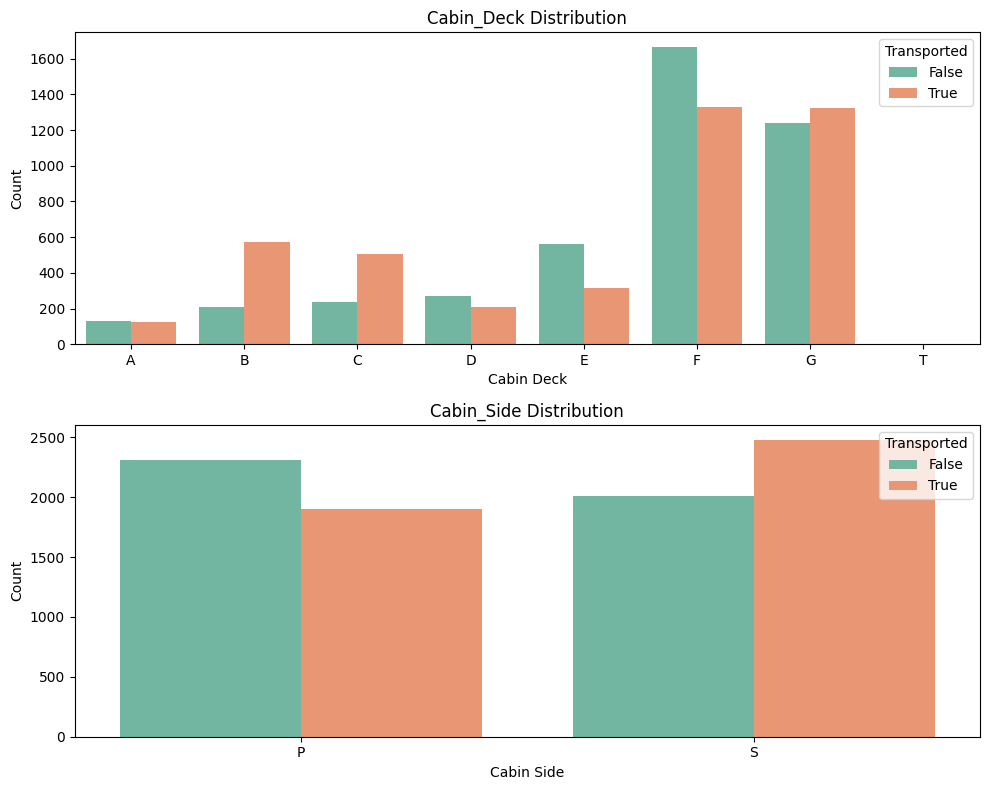

In [35]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
sns.countplot(x="Cabin_Deck", hue="Transported", data=train_df, palette="Set2", order=["A", "B", "C", "D", "E", "F", "G", "T"])
plt.title("Cabin_Deck Distribution")
plt.xlabel("Cabin Deck")
plt.ylabel("Count")
plt.legend(title="Transported")

plt.subplot(2, 1, 2)
sns.countplot(x="Cabin_Side", hue="Transported", data=train_df, palette="Set2")
plt.title("Cabin_Side Distribution")
plt.xlabel("Cabin Side")
plt.ylabel("Count")
plt.legend(title="Transported")

plt.tight_layout()
plt.show()

- There are really less passenger in cabin T, we can treat them as outlier

- Most of the passengers from deck F and G

- Passengers from B & C highly transported



Let's plot Cabin Intervals which we constructed just before

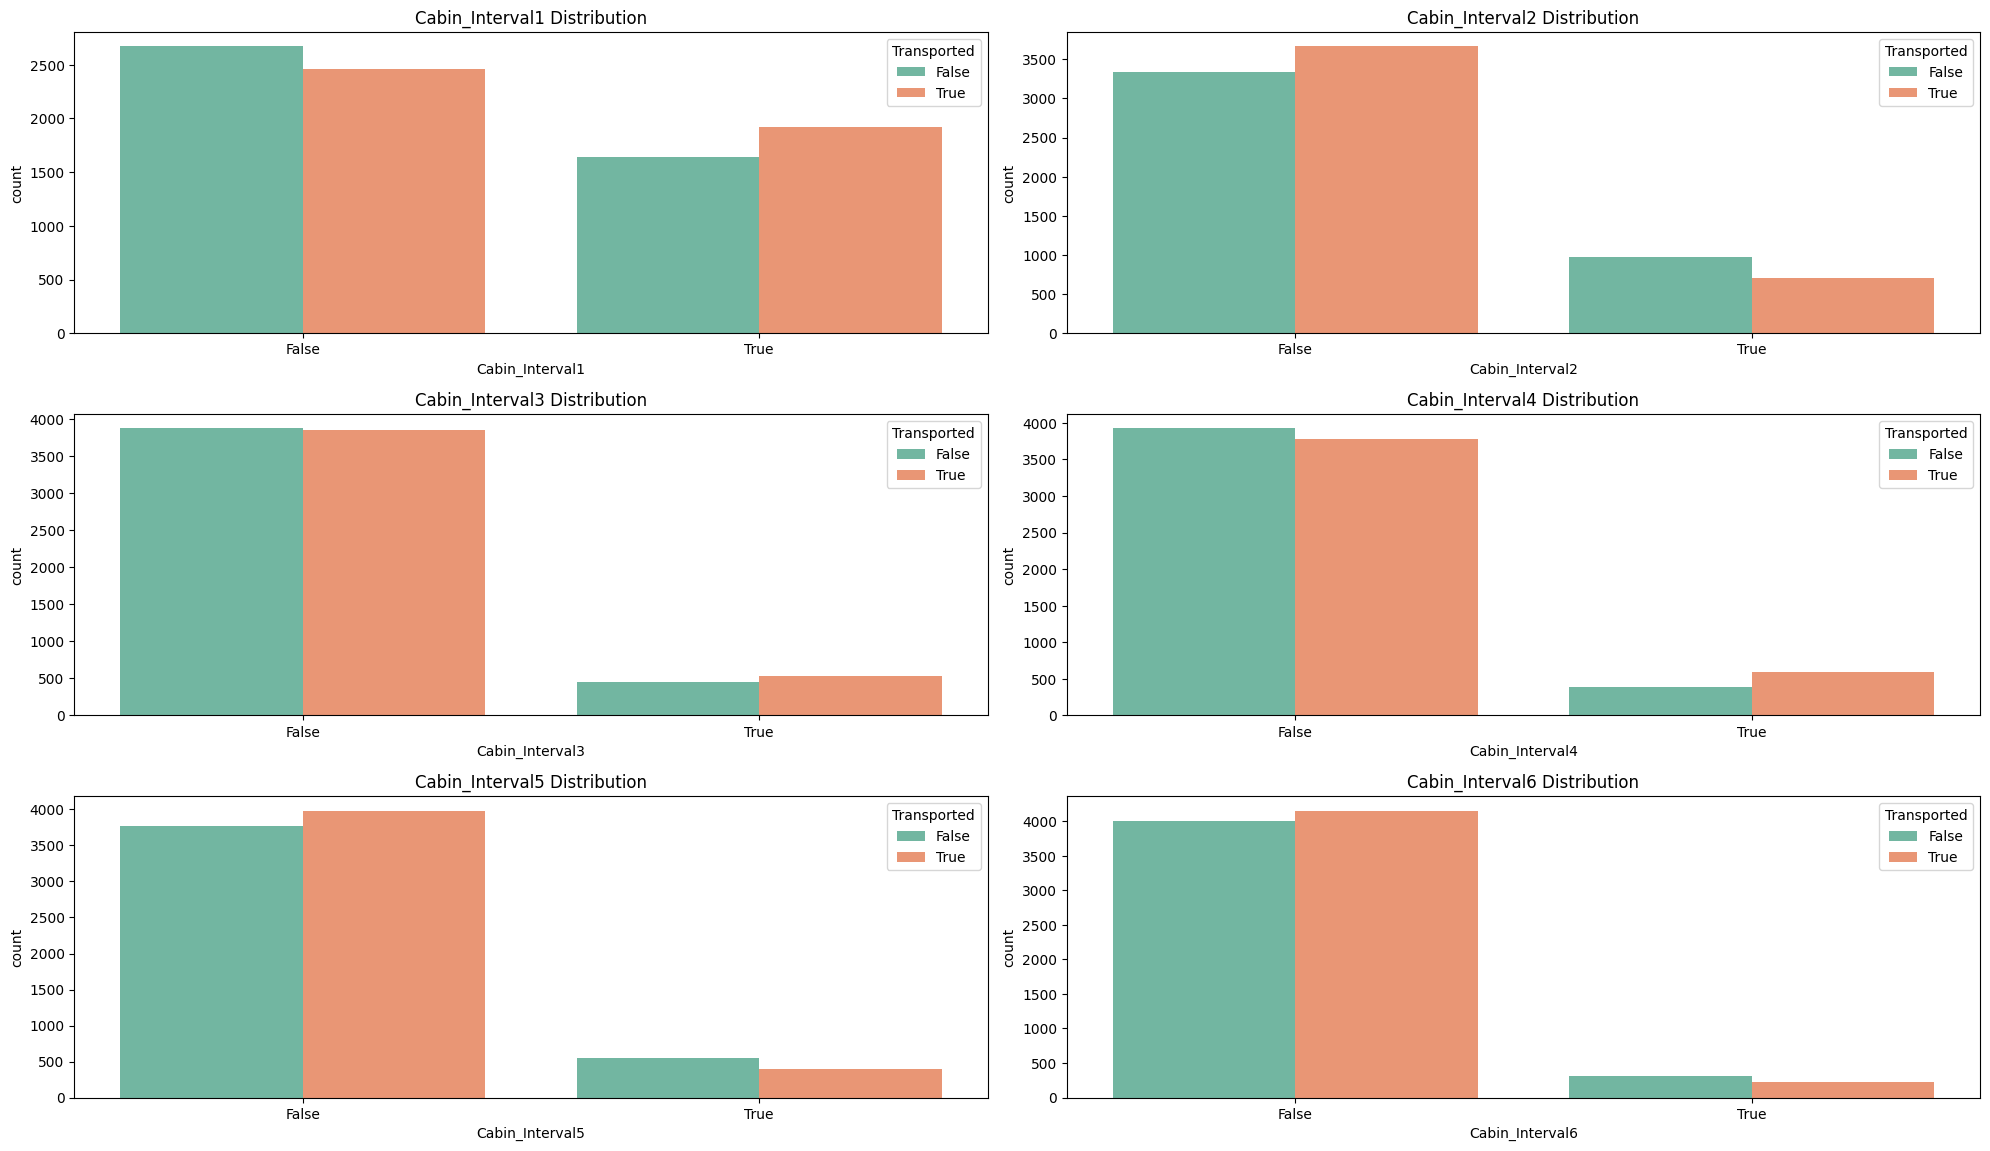

In [36]:
cols = ["Cabin_Interval1", "Cabin_Interval2", "Cabin_Interval3", "Cabin_Interval4", "Cabin_Interval5", "Cabin_Interval6"]

plt.figure(figsize=(20,15))
for i,value in enumerate(cols):
    plt.subplot(4,2,i+1)
    sns.countplot(x=value, hue="Transported", data=train_df, palette="Set2")
    plt.title(f"{value} Distribution")
    plt.tight_layout()


- #of Cabin Interval increases ----> passengers transport decreases

10. Our last feature engineering will be cover PassengerId which is in form gggg_pp which pp means #of people in group & gggg is group

In [37]:
def passengerid_new_features(df):
    df[["Group", "Member"]] = df["PassengerId"].str.split("_", expand=True)

    group_sizes = df["Group"].value_counts()

    df["Travelling_Solo"] = df["Group"].apply(lambda x: group_sizes[x] == 1)

    df["Group_Size"] = df["Group"].map(group_sizes)

    return df

train_df = passengerid_new_features(train_df)
test_df = passengerid_new_features(test_df)


- We don't need Group & Member column no more, i will drop them.

In [38]:
train_df.drop(columns=["Group","Member"],inplace=True)
test_df.drop(columns=["Group","Member"],inplace=True)

11. Visualizing new columns , Travelling_Solo & Group_Size

<ipython-input-39-2ac67c35bc95>:7: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x="Group_Size", hue="Transported", data=train_df, palette=palette)
<ipython-input-39-2ac67c35bc95>:16: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df, palette=palette)


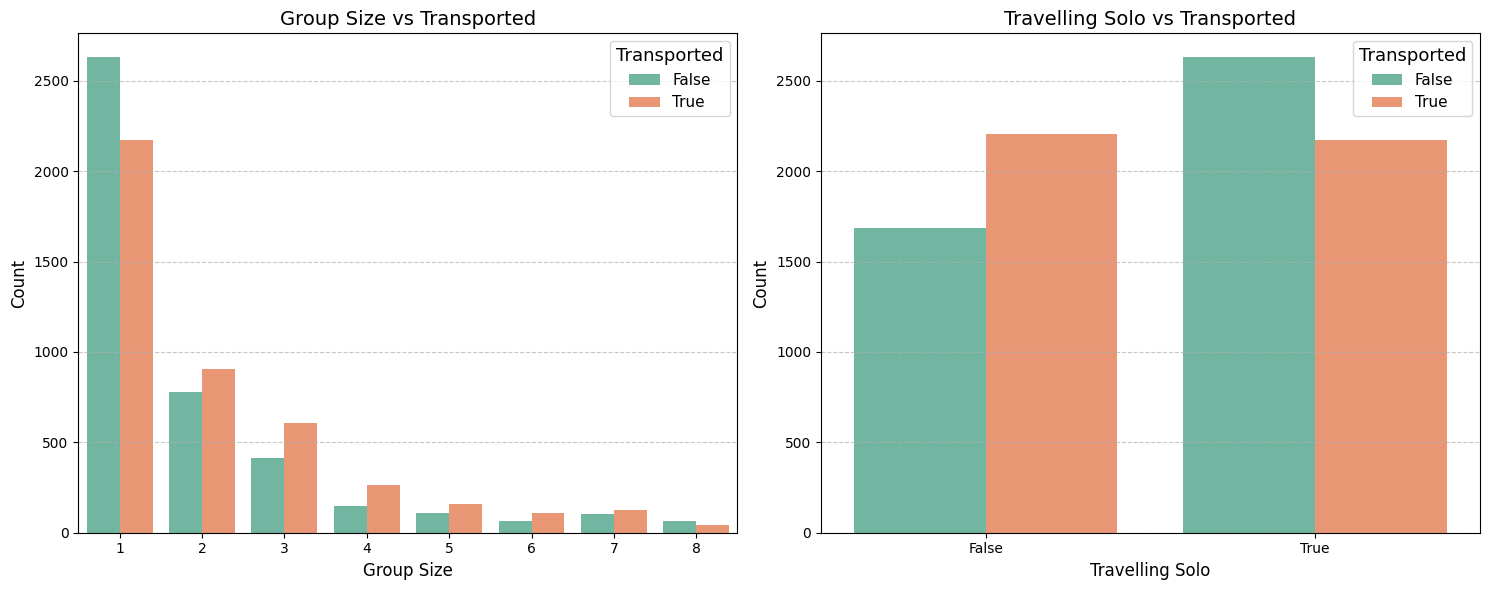

In [39]:
plt.figure(figsize=(15, 6))

palette = sns.color_palette("Set2")

#Group_Size vs Transported
plt.subplot(1, 2, 1)
sns.countplot(x="Group_Size", hue="Transported", data=train_df, palette=palette)
plt.title("Group Size vs Transported", fontsize=14)
plt.xlabel("Group Size", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Transported", title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Travelling Solo vs Transported
plt.subplot(1, 2, 2)
sns.countplot(x="Travelling_Solo", hue="Transported", data=train_df, palette=palette)
plt.title("Travelling Solo vs Transported", fontsize=14)
plt.xlabel("Travelling Solo", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Transported", title_fontsize='13', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

- **CONCLUSION**
- Most passaengers are travelling alone
- If a person travelling alone less likely to be transported


11. Now we can look qualitative data and general overview of our data

In [40]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Cabin_Deck,Cabin_Side,Cabin_Interval1,Cabin_Interval2,Cabin_Interval3,Cabin_Interval4,Cabin_Interval5,Cabin_Interval6,Travelling_Solo,Group_Size
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,B,P,True,False,False,False,False,False,True,1
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,F,S,True,False,False,False,False,False,True,1
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,A,S,True,False,False,False,False,False,False,2
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,A,S,True,False,False,False,False,False,False,2
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,F,S,True,False,False,False,False,False,True,1


In [41]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       8693 non-null   object  
 1   HomePlanet        8693 non-null   object  
 2   CryoSleep         8693 non-null   bool    
 3   Cabin             8693 non-null   object  
 4   Destination       8693 non-null   object  
 5   Age               8693 non-null   float64 
 6   VIP               8693 non-null   bool    
 7   RoomService       8693 non-null   float64 
 8   FoodCourt         8693 non-null   float64 
 9   ShoppingMall      8693 non-null   float64 
 10  Spa               8693 non-null   float64 
 11  VRDeck            8693 non-null   float64 
 12  Name              8693 non-null   object  
 13  Transported       8693 non-null   bool    
 14  Total_Spending    8693 non-null   float64 
 15  No_Spending       8693 non-null   bool    
 16  Expense_Category  8693 n

- Plotting categorical features

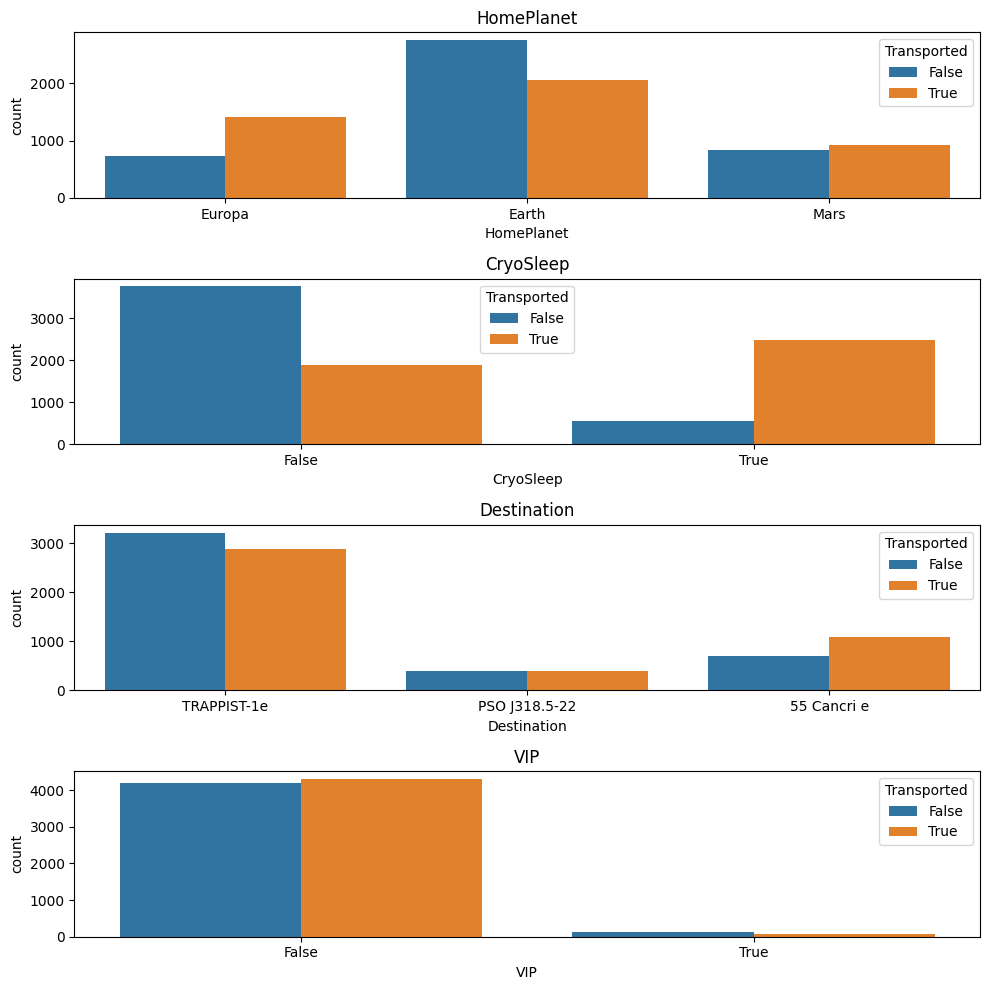

In [42]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

fig=plt.figure(figsize=(10,10))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

- VIP doesn't seem like a useful feature
- In contrast, CryoSleep appears to be useful

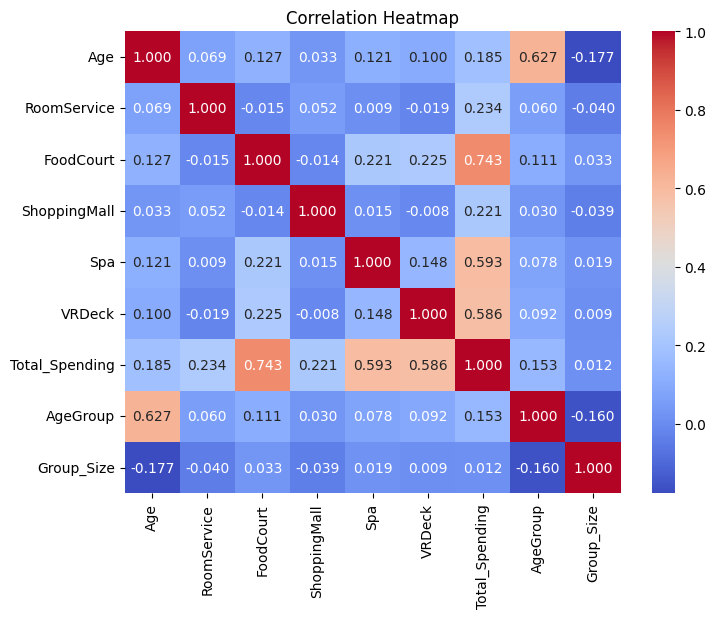

In [43]:
numerical_cols = train_df.select_dtypes(include='number').columns

plt.figure(figsize=(8, 6))
sns.heatmap(train_df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.3f')
plt.title("Correlation Heatmap")
plt.show()

### 1.3 Data Pre-Processing

1. Since i have already done all feature engineering , i can drop some columns which have high cardinality

In [44]:
cols = ["PassengerId","Cabin","Name"]
train_df.drop(columns =cols, inplace=True)
test_df.drop(columns=cols, inplace=True)

Looking statistical overview of our data

In [45]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Total_Spending,AgeGroup,Group_Size
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820,1440.866329,2.218912,2.035546
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417,2803.045694,1.398688,1.596347
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,716.000000,2.000000,1.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1441.000000,3.000000,3.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,35987.000000,5.000000,8.000000


- %50 of each spendings is 0 mean that they have right skewed distribution

- So we can simply say there is a presence of large amount of outliers in these features.

- We can use several transformation to transform to normal distribution such as log, Box-Cox, Yeo-Johnson, and Quantile transformation

Let's compare these transformations with a simple visualization


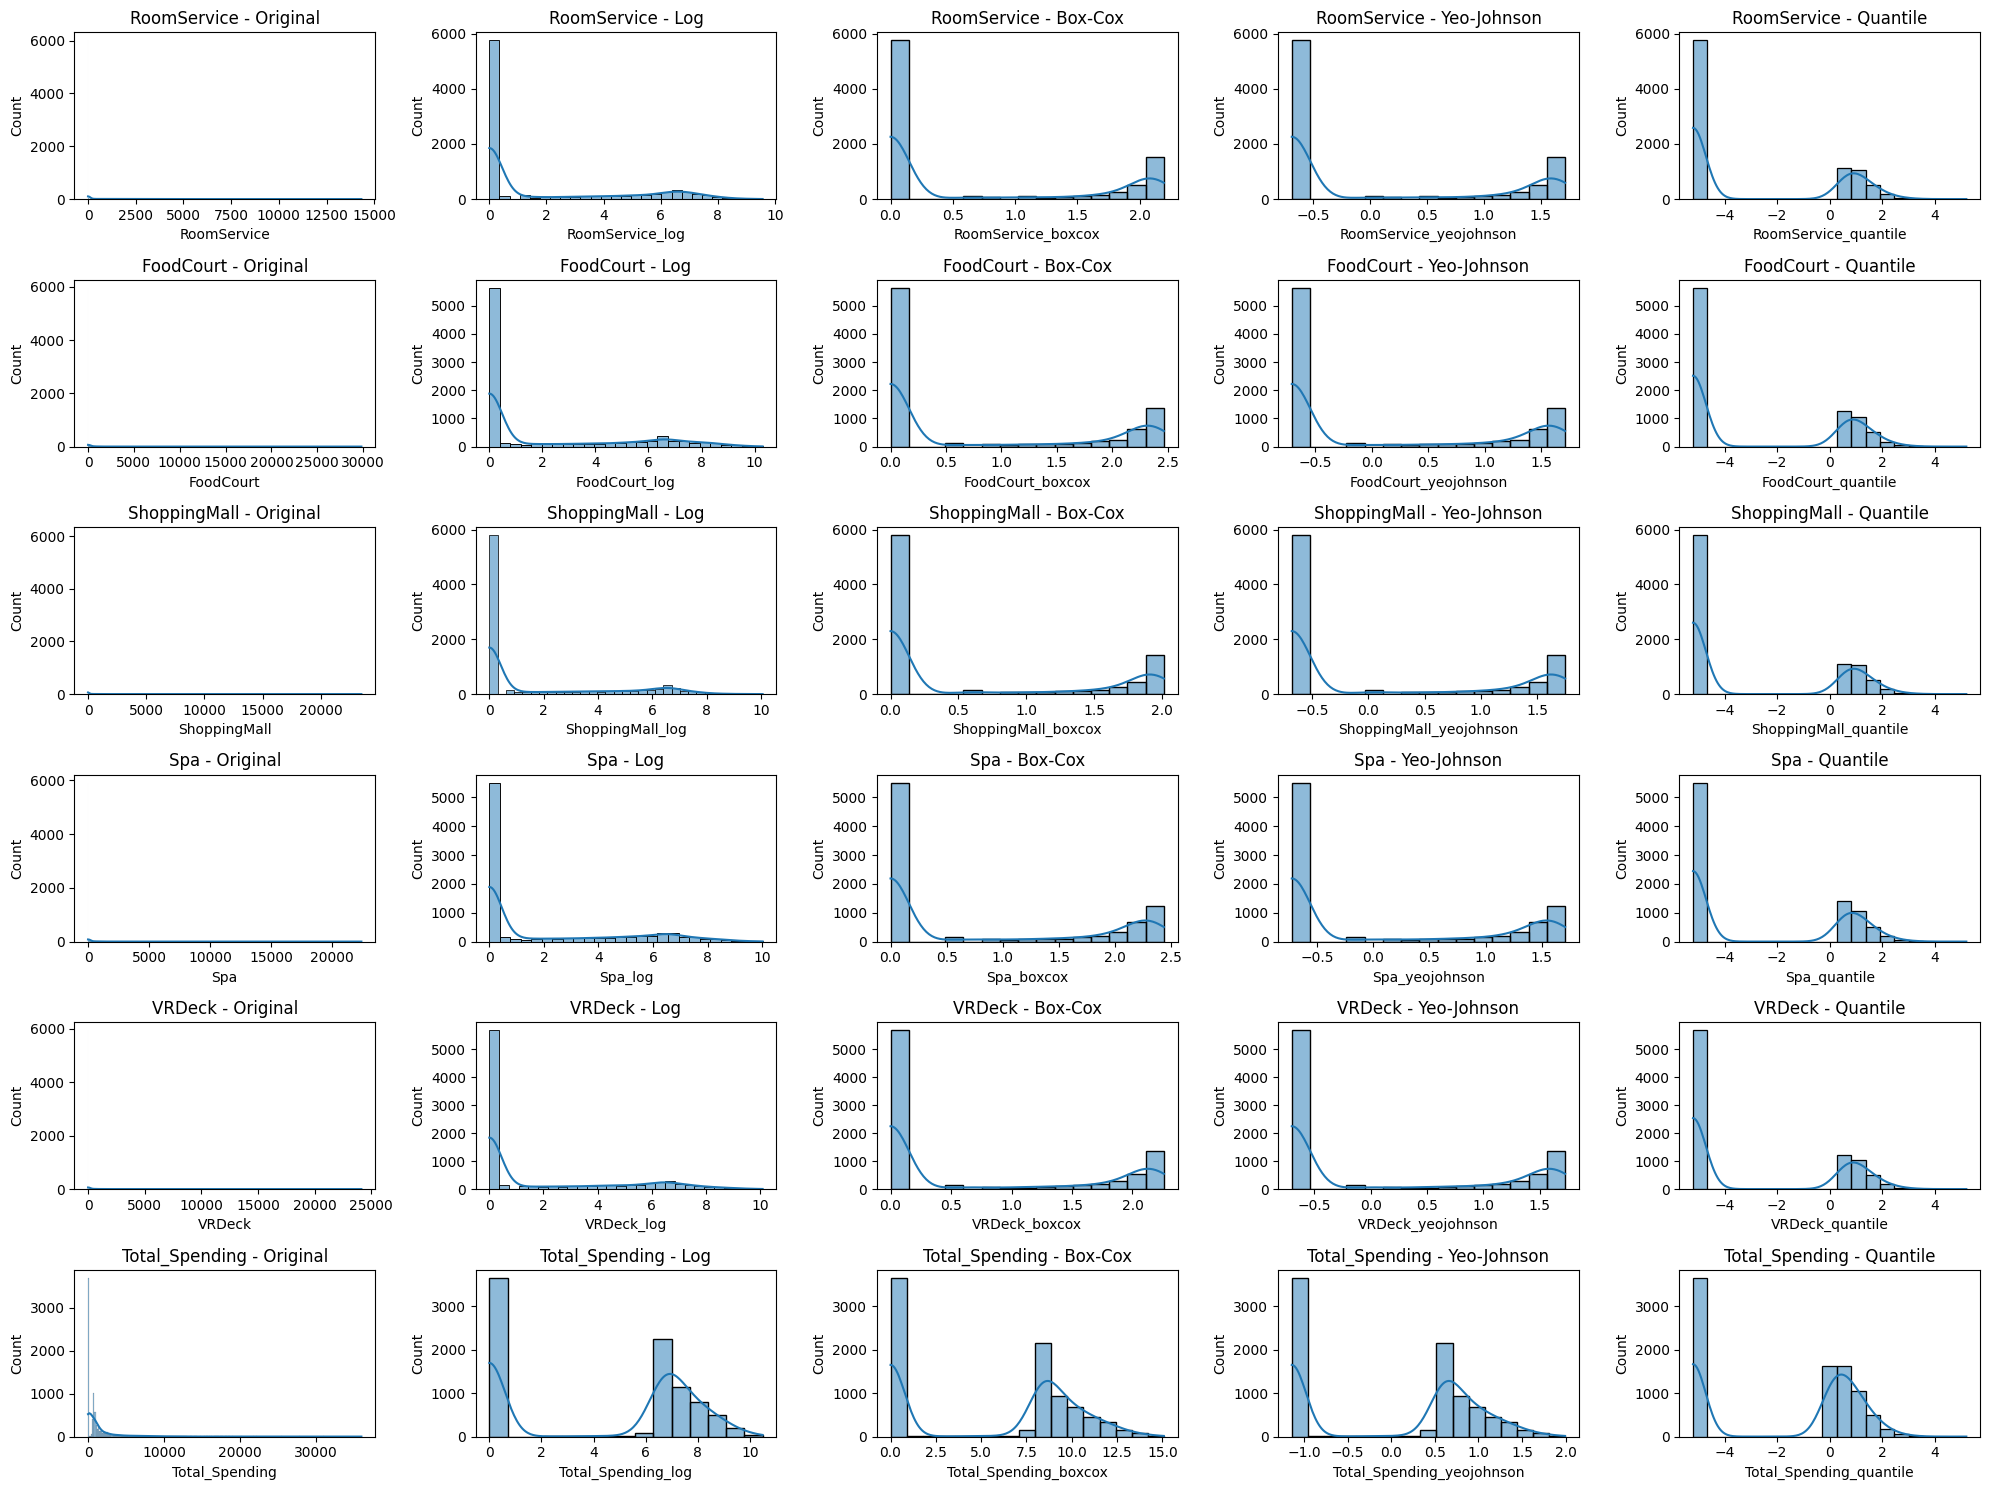

In [46]:
exp_cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_Spending']

pt_yeo = PowerTransformer(method='yeo-johnson')
qt = QuantileTransformer(output_distribution='normal')

transformed_data = pd.DataFrame()

for col in exp_cols:
    # Apply log transformation
    transformed_data[f'{col}_log'] = np.log1p(train_df[col])

    # Apply Box-Cox transformation (handle 0 values by adding 1)
    transformed_data[f'{col}_boxcox'], _ = boxcox(train_df[col] + 1)

    # Apply Yeo-Johnson transformation
    transformed_data[f'{col}_yeojohnson'] = pt_yeo.fit_transform(train_df[[col]])

    # Apply Quantile transformation
    transformed_data[f'{col}_quantile'] = qt.fit_transform(train_df[[col]])

fig, axes = plt.subplots(len(exp_cols), 5, figsize=(20, 15))
for i, col in enumerate(exp_cols):
    sns.histplot(train_df[col], ax=axes[i, 0], kde=True)
    axes[i, 0].set_title(f'{col} - Original')

    sns.histplot(transformed_data[f'{col}_log'], ax=axes[i, 1], kde=True)
    axes[i, 1].set_title(f'{col} - Log')

    sns.histplot(transformed_data[f'{col}_boxcox'], ax=axes[i, 2], kde=True)
    axes[i, 2].set_title(f'{col} - Box-Cox')

    sns.histplot(transformed_data[f'{col}_yeojohnson'], ax=axes[i, 3], kde=True)
    axes[i, 3].set_title(f'{col} - Yeo-Johnson')

    sns.histplot(transformed_data[f'{col}_quantile'], ax=axes[i, 4], kde=True)
    axes[i, 4].set_title(f'{col} - Quantile')

plt.tight_layout()
plt.show()

2. Since we're working on values that grater or equal 0.Let's make Log-Transformation and visualize


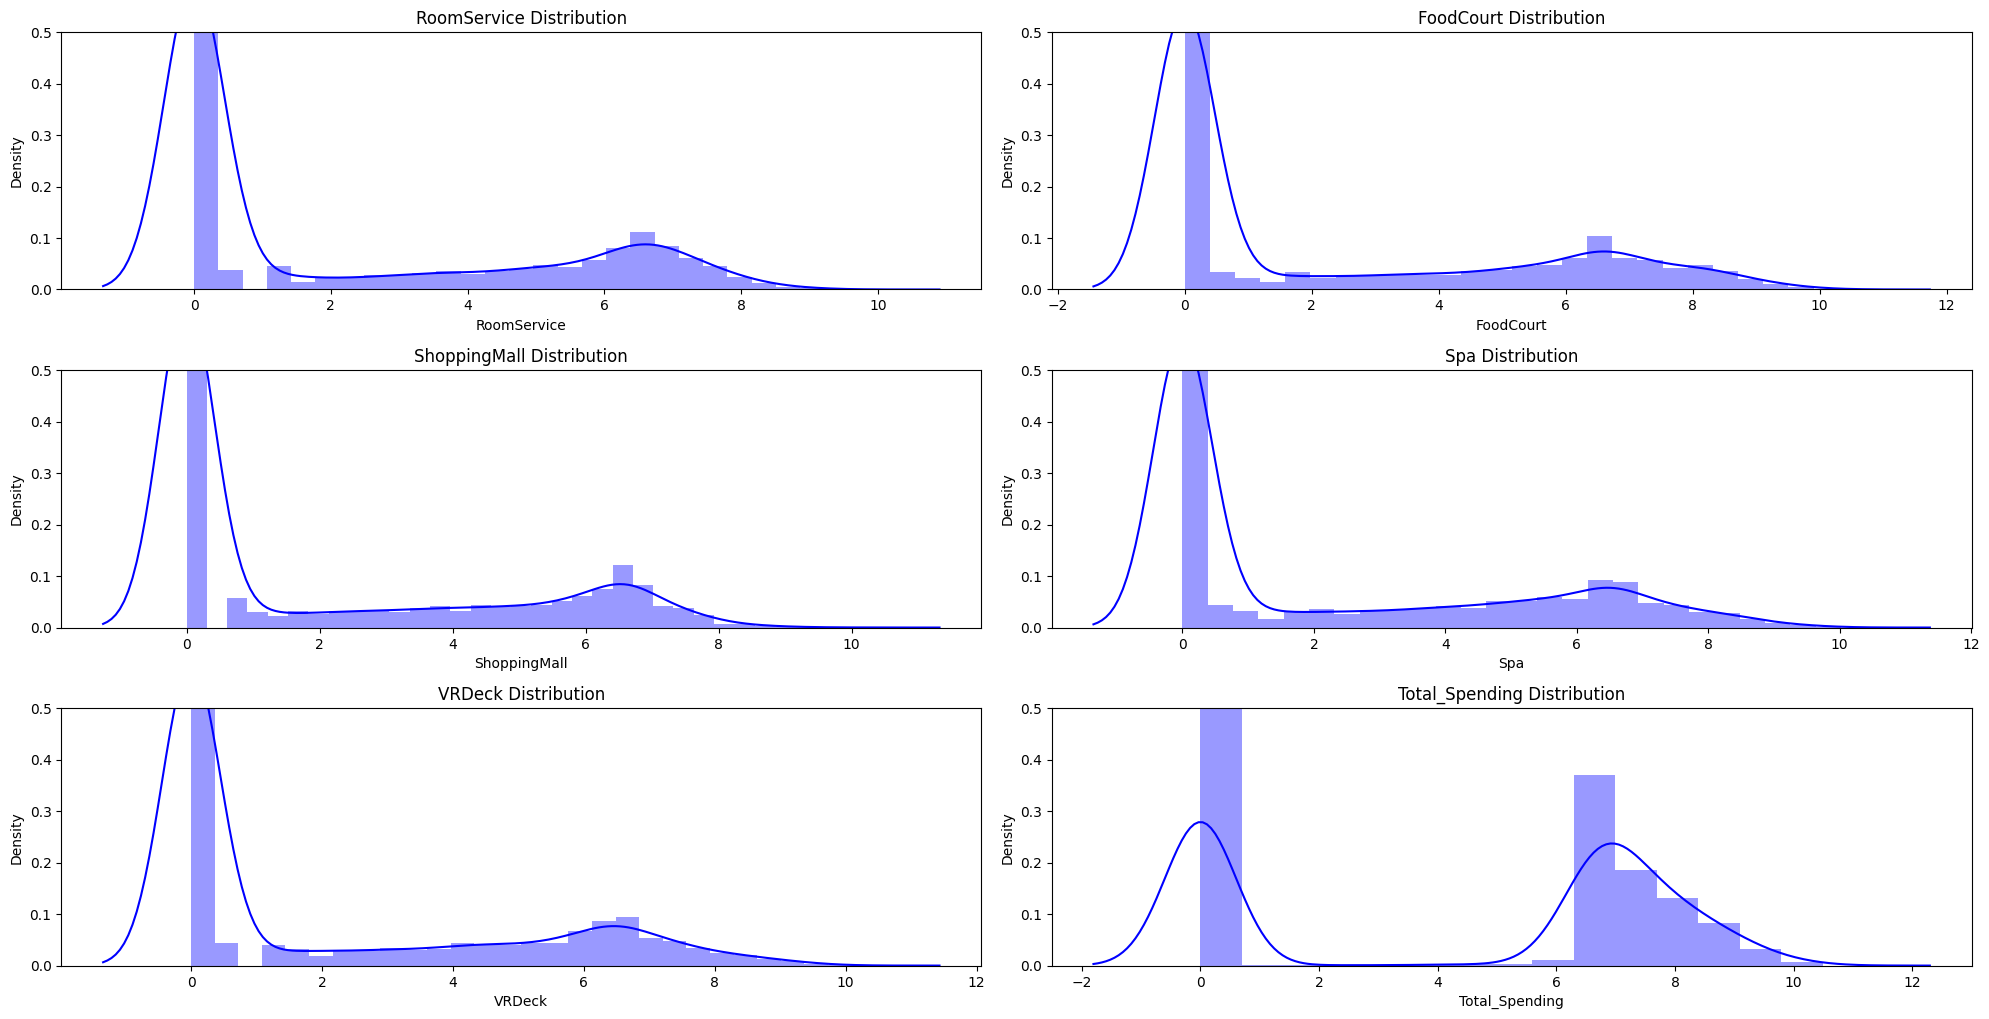

In [47]:
import warnings
warnings.filterwarnings("ignore")

cols = ['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total_Spending']

# Apply log transformation to train and test datasets
for value in cols:
    train_df[value] = np.log1p(train_df[value])
    test_df[value] = np.log1p(test_df[value])

x = 1
plt.figure(figsize=(20, 20))
for i in cols:
    plt.subplot(6, 2, x)
    sns.distplot(train_df[i], color="blue")
    plt.title(f"{i} Distribution")
    plt.tight_layout()
    plt.ylim(0, 0.5)
    x += 1

plt.show()

- It is a good way to handle outliers

3. To make necessary data type changes first let's look at cleaned data.info

In [48]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   HomePlanet        8693 non-null   object  
 1   CryoSleep         8693 non-null   bool    
 2   Destination       8693 non-null   object  
 3   Age               8693 non-null   float64 
 4   VIP               8693 non-null   bool    
 5   RoomService       8693 non-null   float64 
 6   FoodCourt         8693 non-null   float64 
 7   ShoppingMall      8693 non-null   float64 
 8   Spa               8693 non-null   float64 
 9   VRDeck            8693 non-null   float64 
 10  Transported       8693 non-null   bool    
 11  Total_Spending    8693 non-null   float64 
 12  No_Spending       8693 non-null   bool    
 13  Expense_Category  8693 non-null   category
 14  AgeGroup          8693 non-null   int64   
 15  Cabin_Deck        8693 non-null   object  
 16  Cabin_Side        8693 n

- Note that Cabin_Intervals , CryoSleep , VIP, Travelling_Solo contain boolean values we may consider changing their datatypes

In [49]:
cols = ["CryoSleep","VIP","Travelling_Solo","No_Spending","Cabin_Interval1","Cabin_Interval2","Cabin_Interval3","Cabin_Interval4",
       "Cabin_Interval5","Cabin_Interval6"]

train_df[cols] = train_df[cols].astype(bool)
test_df[cols] = test_df[cols].astype(bool)


In [50]:
nominal_cat_cols = ["HomePlanet","Destination"]
ordinal_cat_cols = ["CryoSleep","VIP","Travelling_Solo","Cabin_Deck","Cabin_Side","Cabin_Interval1","Cabin_Interval2",
                    "Cabin_Interval3","Cabin_Interval4","Cabin_Interval5","Cabin_Interval6","AgeGroup","No_Spending",
                    "Expense_Category"]

enc = LabelEncoder()

for col in ordinal_cat_cols:
    train_df[col] = enc.fit_transform(train_df[col]);
    test_df[col] = enc.transform(test_df[col])


train_df = pd.get_dummies(train_df,columns=nominal_cat_cols)
test_df = pd.get_dummies(test_df,columns=nominal_cat_cols)



- Don't forget the "Transported" column and check updated dataframe

In [51]:
train_df["Transported"].replace({False:0,True:1},inplace=True)

train_df.head(5)

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Total_Spending,...,Cabin_Interval5,Cabin_Interval6,Travelling_Solo,Group_Size,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0,39.0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.000000,...,0,0,1,1,False,True,False,False,False,True
1,0,24.0,0,4.700480,2.302585,3.258097,6.309918,3.806662,1,6.602588,...,0,0,1,1,True,False,False,False,False,True
2,0,58.0,1,3.784190,8.182280,0.000000,8.812248,3.912023,0,9.248021,...,0,0,0,2,False,True,False,False,False,True
3,0,33.0,0,0.000000,7.157735,5.918894,8.110728,5.267858,0,8.551981,...,0,0,0,2,False,True,False,False,False,True
4,0,16.0,0,5.717028,4.262680,5.023881,6.338594,1.098612,1,6.995766,...,0,0,1,1,True,False,False,False,False,True


# **2 - Machine Learning Applications**

## 2.1 Data Splitting & Feature Scaling

- Summarize the models

**Logistic Regression**:  Fits a sigmoid curve to binary output using Maximum Likelihood Estimation.

**K-Nearest Neighbors (KNN)**: Classifies by the majority class of k-nearest neighbors based on Euclidean distance.


**Support Vector Machine (SVM)**: Finds optimal hyperplane to separate data points, potentially using a kernel trick for non-linear separations.


**Random Forest (RF):** Ensemble of decision trees built via bagging, reducing variance and robust to data changes.


**Extreme Gradient Boosting (XGBoost)**:  Ensemble of decision trees optimized with extreme gradient boosting, often highly accurate but slower.


**Light Gradient Boosting Machine (LGBM)**: Similar to XGBoost but faster due to a lighter boosting technique.


**Naive Bayes (NB):** Classifies using Bayes' Theorem, assuming input features are independent, and updating probability estimates based on prior information.



In [52]:
X = train_df.drop(columns=["Transported"])
y = train_df[["Transported"]]

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
test_df_scaled = scaler.fit_transform(test_df)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)



(6954, 28) (6954, 1)


## 2.2 - Comparing the models and find the best model

In [53]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Ada Boost': AdaBoostClassifier(),
    'Gradient Boost': GradientBoostingClassifier(),
    'LGBM': LGBMClassifier(),
    'XGBoost': XGBClassifier()
}

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    },
    'KNN': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf', 'poly']
    },
    'Naive Bayes': {},
    'Decision Tree': {
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'n_estimators': [10, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    },
    'Ada Boost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1]
    },
    'Gradient Boost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    },
    'LGBM': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'num_leaves': [31, 63, 127]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1],
        'max_depth': [3, 5, 7]
    }
}

2. GridSearchCV is used to perform exhaustive search over specified parameter values for each model. It selects the parameters that yield the best cross-validated performance.

In [54]:
best_estimators = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name],
                               scoring='accuracy', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validation accuracy for {model_name}: {grid_search.best_score_}")

Training Logistic Regression...
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best cross-validation accuracy for Logistic Regression: 0.7792661973943491
Training KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best cross-validation accuracy for KNN: 0.7670417742010562
Training SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'poly'}
Best cross-validation accuracy for SVM: 0.7935020093199345
Training Naive Bayes...
Best parameters for Naive Bayes: {}
Best cross-validation accuracy for Naive Bayes: 0.7372763241599387
Training Decision Tree...
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best cross-validation accuracy for Decision Tree: 0.7867422122690058
Training Random Forest...
Best parameters for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 50}
Best cross-validation accuracy for Ra

3. After selecting the best model with hyperparameter tuning, we evaluate its performance on the test set.Evaluation metrics like accuracy, precision, recall, F1 score are calculated

In [55]:
evaluation_metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

for model_name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    evaluation_metrics = pd.concat([evaluation_metrics, pd.DataFrame([{
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
    }])], ignore_index=True)

print(evaluation_metrics)


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.768833   0.769468  0.768833  0.768611
1                  KNN  0.763082   0.763111  0.763082  0.763087
2                  SVM  0.779183   0.782682  0.779183  0.778325
3          Naive Bayes  0.744106   0.748777  0.744106  0.743149
4        Decision Tree  0.778608   0.779127  0.778608  0.778434
5        Random Forest  0.803335   0.803473  0.803335  0.803336
6            Ada Boost  0.786659   0.788977  0.786659  0.786097
7       Gradient Boost  0.799885   0.800492  0.799885  0.799721
8                 LGBM  0.805060   0.805085  0.805060  0.805041
9              XGBoost  0.806210   0.806375  0.806210  0.806151


*Accuracy*:

Accuracy measures the proportion of correctly classified instances out of the total instances.

*Precision*:

Precision measures the proportion of true positive predictions among all positive predictions made by the model.

*Recall*:

Recall measures the proportion of true positive predictions among all actual positive instances in the data.

*F1 Score*:

F1 Score is the harmonic mean of precision and recall, providing a single score that balances both metrics.

In [56]:
best_model_name = evaluation_metrics.loc[evaluation_metrics['Accuracy'].idxmax(), 'Model']
best_model = best_estimators[best_model_name]
print(f"The best model is {best_model_name} with a test accuracy of {evaluation_metrics['Accuracy'].max()}")

The best model is XGBoost with a test accuracy of 0.8062104657849338


Great! We have concluded that the best model is XGBoost

In [57]:
final_grid_search = GridSearchCV(estimator=best_model, param_grid=param_grids[best_model_name],
                                 scoring='accuracy', cv=5, n_jobs=-1)
final_grid_search.fit(X_train, y_train)
final_best_model = final_grid_search.best_estimator_

# Evaluate the final model on the test set
y_final_pred = final_best_model.predict(X_test)
final_test_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final test accuracy for the best model ({best_model_name}): {final_test_accuracy}")

Final test accuracy for the best model (XGBoost): 0.8062104657849338


4. The confusion matrix provides a more detailed breakdown of the model's performance by showing the number of true positives, false positives, true negatives, and false negatives.

<Figure size 800x600 with 0 Axes>

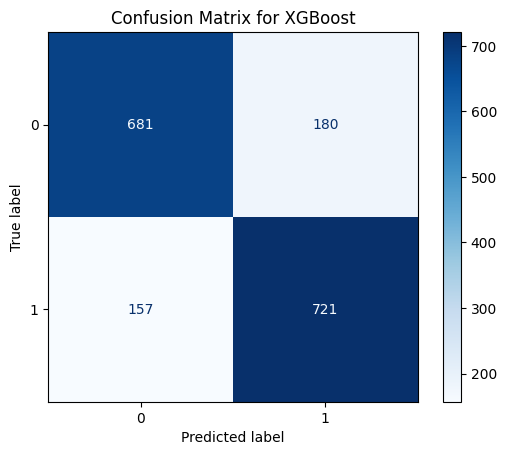

In [58]:
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix for {best_model_name}')
plt.show()

5. Now check for cross-validation score.Cross-validation is performed to assess the model's robustness and generalization ability.A higher cross-validation score indicates a more robust model.

In [59]:
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f'Cross-validation scores for {best_model_name}: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores for XGBoost: [0.75388154 0.80161012 0.80161012 0.82911392 0.80552359]
Mean cross-validation score: 0.7983478594036095


6. Now check for feature importance. Feature importance helps in understanding the underlying patterns learned by the model and identifying significant predictors.



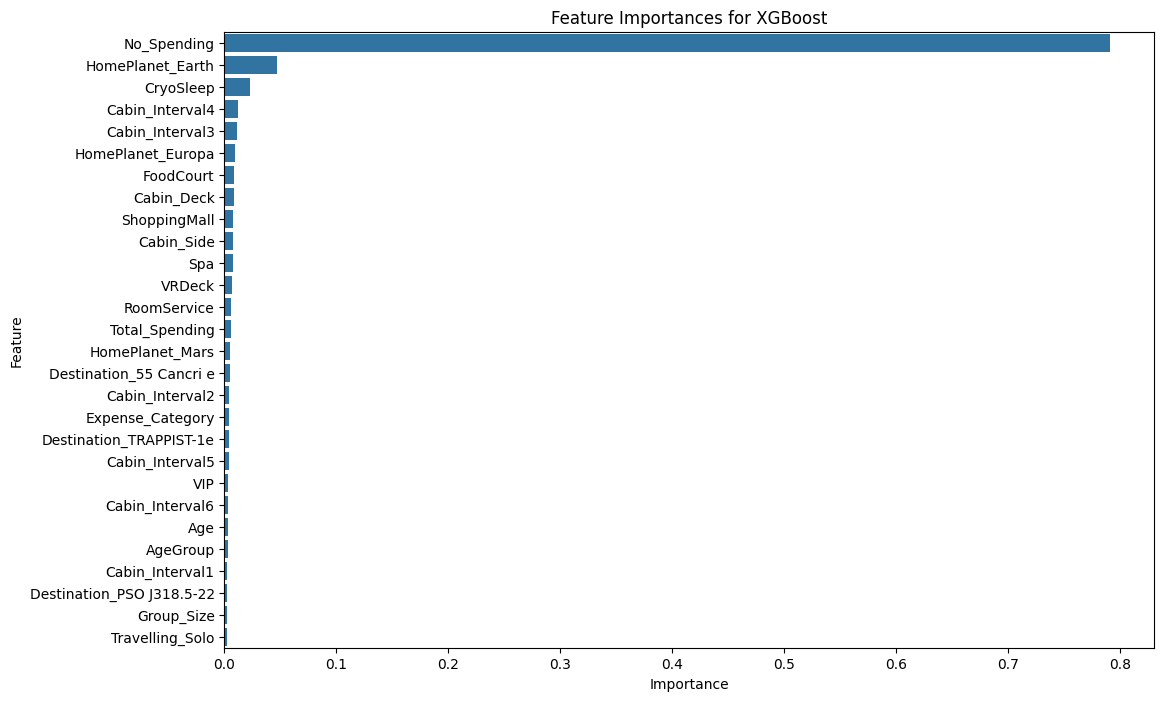

In [60]:
if hasattr(best_model, 'feature_importances_'):
    feature_importances = best_model.feature_importances_
    features = X.columns
    importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importances_df = importances_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importances_df)
    plt.title(f'Feature Importances for {best_model_name}')
    plt.show()

else:
    print(f'Feature importance is not available for {best_model_name}')

- As we can see No_Spending has really high importance, and HomePlanet_Earth,CryoSleep follows it

7. Let's compare other models by using confusion matrix

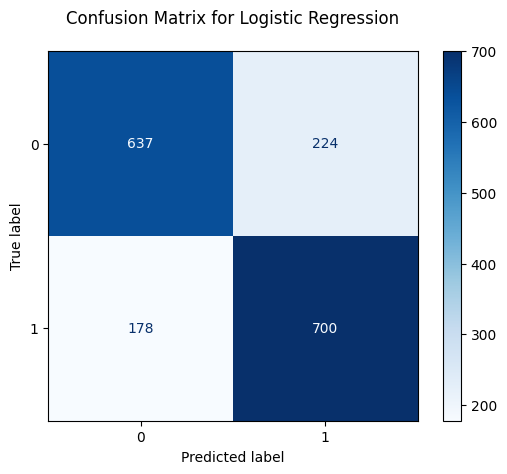

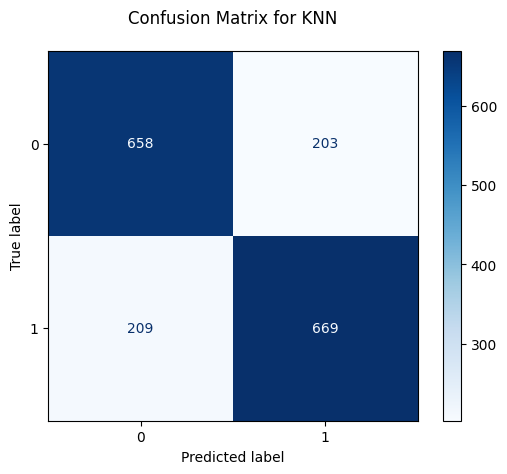

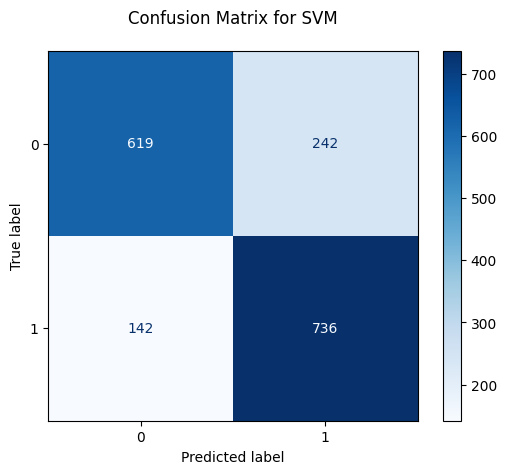

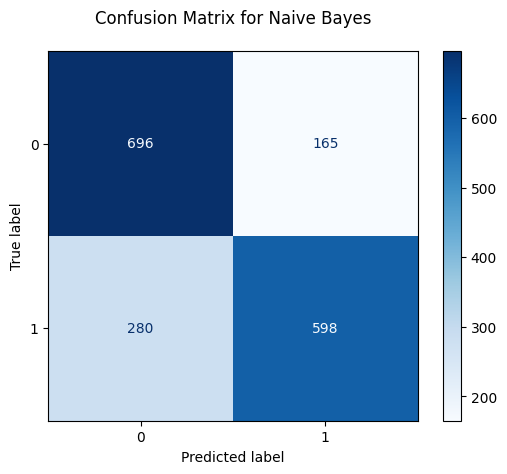

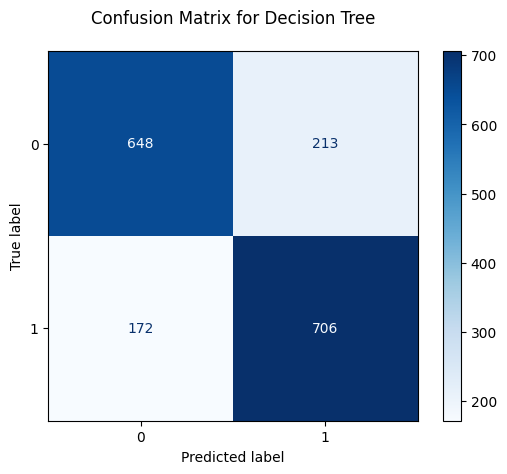

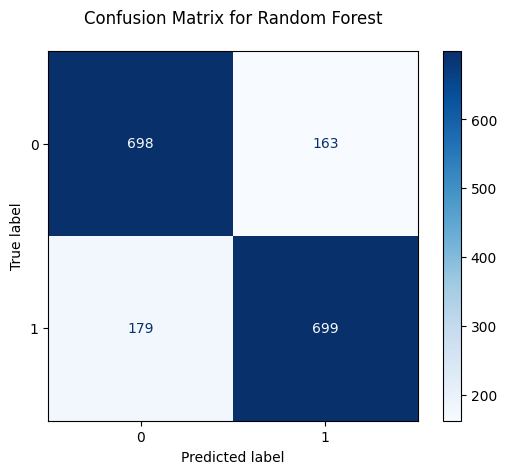

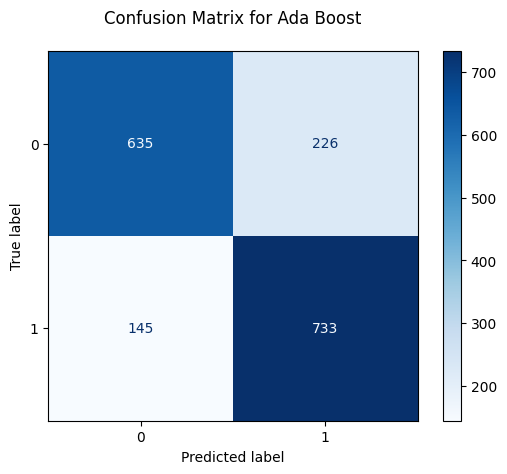

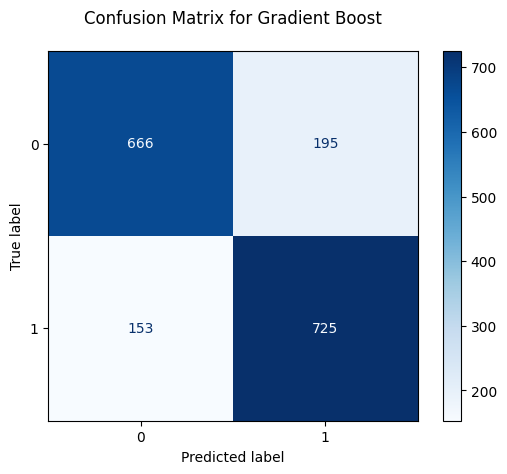

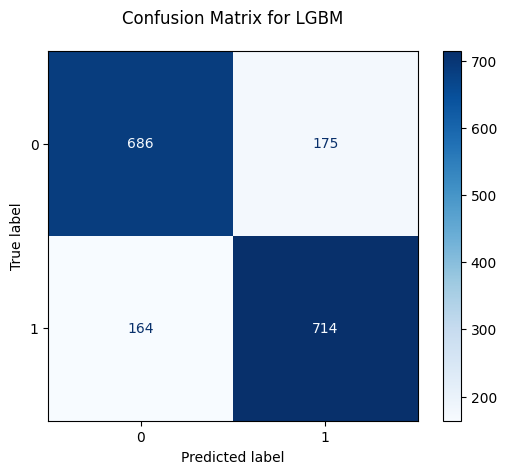

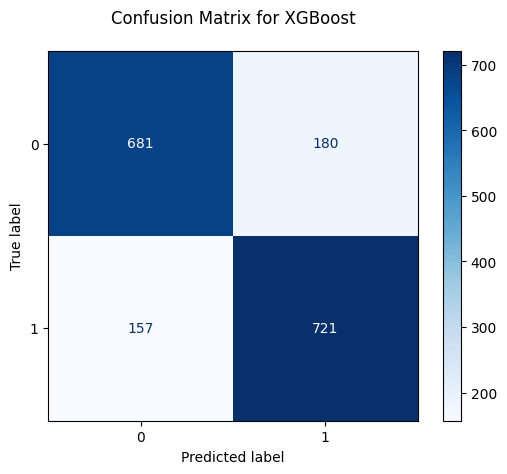

In [61]:
for model_name, model in best_estimators.items():
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, values_format='d')
    disp.ax_.set_title(f'Confusion Matrix for {model_name}', pad=20)
    plt.show()

8. Let's make same prediction

In [62]:
pred = best_model.predict(test_df)

In [63]:
pred

array([1, 0, 1, ..., 1, 1, 1])

# **3 - Conclusion**

### 3.1 Analysis from EDA

1. Firstly, I encountered missing values during my exploration. Instead of dropping them, I decided to impute them using appropriate statistical methods.


2. Then, I checked our target column "Transported" and found it to be highly balanced, so there was no need to use methods like under-sampling or over-sampling.


3. In the age column, there is a nearly normal distribution, and I noticed three key points:
   - Most passengers are aged between 20 and 30.

   - Passengers aged 0 to 18 are highly transported.

   - Passengers aged 20 to 30 are less transported.

   - Additionally, I decided to perform some feature engineering by grouping the Age column into an "AgeGroup" column.


4. After analyzing the spending columns, I observed the following:

   - Most expenses are zero in our data, so high expenses can be treated as outliers.

   - All expense columns exhibit rapid decay and are right-skewed.

   - Passengers with lower expenses are highly transported.

   - Since all expenses are right-skewed, I decided to use log transformation to normalize their distribution. I also performed feature engineering by creating two new columns: "No_Spending" and "Total_Spending".

5. Upon analyzing the general overview of the data, I noticed that most passengers are from Earth, and passengers from Europa are highly transported.


6. I then performed some feature engineering on the PassengerId column, creating new columns: "Group_Size" and "Travelling_Solo".


7. Additionally, I performed feature engineering on the Cabin column by splitting it into three columns: Cabin_Deck, Cabin_Number, and Cabin_Side. I visualized these columns to gain further insights:
   - There are very few passengers in Cabin_Deck T.

   - Passengers from Cabin Decks B and C are highly transported.

   - I also created new columns from Cabin_Number, such as Cabin_Interval.


### 3.2 Analysis From Machine Learning Applications

**1.** After splitting and scaling the data, I decided to compare several models to determine which one best fits the dataset. The models I compared are:

2. In this process i compared these models:
-    Logistic Regression
-    KNN
-    SVM
-    Naive Bayes
-    Decision Tree
-    Random Forest
-    Ada Boost
-    Gradient Boost
-    LGBM
-    XGBoost

3. I evaluated these models using the metrics "Accuracy," "Precision," "Recall," and "F1 Score." The results are summarized in the table below:


 Model | Accuracy | Precision |   Recall | F1 Score
-------|----------|-----------|----------|---------|
 Logistic Regression|  0.768833 |  0.769468  |0.768833 | 0.768611
                 KNN | 0.763082 |  0.763111 | 0.763082 | 0.763087
                 SVM | 0.779183 |  0.782682|  0.779183 | 0.778325
        Naive Bayes | 0.744106 |  0.748777 | 0.744106 | 0.743149
       Decision Tree | 0.779758 |  0.780175 | 0.779758 | 0.779613
       Random Forest | 0.795860 |  0.796012 | 0.795860 | 0.795860
          Ada Boost | 0.786659 |  0.788977 | 0.786659 | 0.786097
     Gradient Boost | 0.799885 |  0.800492 | 0.799885 | 0.799721
               LGBM | 0.805060 |  0.805085 | 0.805060 | 0.805041
             XGBoost | 0.806210 |  0.806375 | 0.806210 | 0.806151

4. Based on these metrics, I concluded that XGBoost is the best-fitting model for this dataset.



5. To visually compare the performance of each model, I plotted the confusion matrices for all the models mentioned above.

6. To decide which feature is more important for XGBoost model, i have plotted **Feature Importance** Graph then concluded:

- "*No_Spending*" and "*HomePlanet_Earth*" are the most important features.
- "*Cryo_Sleep*" and "*Cabin_Interval4*" also have high importance.


# 4 -Recommendations from my mistakes

1. I believe that thoroughly examining the data before analysis and identifying potential issues that may arise is crucial. I faced a few challenges in this project because of this oversight.



2. Dealing with missing data right from the beginning may not always be a good idea, as it can lead to data leakage.



3. Throughout the project, I inadvertently adopted different approaches, switching between general to specific and specific to general. This sometimes led to errors. It is beneficial to be more cautious and establish a consistent pattern.

